In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
# store feature matrix in X
X = iris.data
# store response vector in Y
Y = iris.target

In [2]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [3]:
# import the class of the model you want to use
# so we should import a k-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
# this object, knows how to do knn classification with k=1
print(knn_classifier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [4]:
# fitting the model with data (training step)
knn_classifier.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [5]:
import numpy as np
print(np.array([[3,5,4,2]]).shape) # this works
print(np.array([3,5,4,2]).shape)  # this doesn't
knn_classifier.predict([[3,5,4,2]]) # 2 means 'virginica'

(1, 4)
(4,)


array([2])

In [6]:
x_new = [[3,5,4,2], [5,4,3,2]]
knn_classifier.predict(x_new)

array([2, 1])

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, Y)
knn_classifier.predict(x_new)  # this time, predicts one for both observations.

array([1, 1])

In [8]:
# let's try use a different model
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X,Y)
logreg_classifier.predict(x_new)

array([2, 0])

In [9]:
# like this, we can't know which model is performing best
# we want model that generalize to new data
logreg_classifier.fit(X,Y)
y_predicted=logreg_classifier.predict(X)
print("lenght of predicted values array ", len(y_predicted))
from sklearn import metrics
# we can just use accuracy score function of metrics library
print("accuracy on training dataset, logReg >>", metrics.accuracy_score(Y, y_predicted))
# training accuracy, actually. 
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, Y)
y_pred=knn_classifier.predict(X)
print("accuracy on training data, knn with k=5 >>", metrics.accuracy_score(Y, y_pred))
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X, Y)
y_pred=knn_classifier.predict(X)
print("accuracy on training data, knn with k=1 >>", metrics.accuracy_score(Y, y_pred))
# it seems that performs better, but actually.. we are overfitting!
# with n_neighbors=1, we just memorize the dataset
# it's like learning the noise, instead of focusing on the signal

lenght of predicted values array  150
accuracy on training dataset, logReg >> 0.96
accuracy on training data, knn with k=5 >> 0.9666666666666667
accuracy on training data, knn with k=1 >> 1.0


In [10]:
# train/test split procedure
print(X.shape)
print(Y.shape)
from sklearn.model_selection import train_test_split
# ?train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(150,)
(90, 4)
(60, 4)
(90,)
(60,)


In [11]:
logReg=LogisticRegression()
logReg.fit(x_train, y_train)
y_pred=logReg.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test))

0.95


In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
y_pred=knn_classifier.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test))

0.95


In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred=knn_classifier.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test))

0.9666666666666667


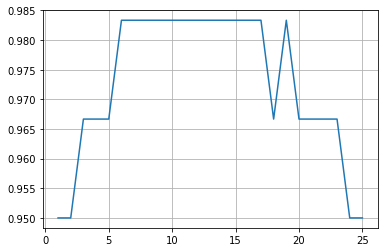

In [14]:
import matplotlib.pyplot as plt
k_range = range(1,26)
scores=[]
%matplotlib inline
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred=knn_classifier.predict(x_test)
    scores.append(metrics.accuracy_score(y_pred, y_test))
plt.plot(k_range, scores)
plt.grid()

In [15]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X,Y)  # remember to re-train the model on whole dataset once you ve decided
knn.predict([[3,5,4,2]])

array([1])

In [17]:
# cross validation for selecting tuning parameters and choosing between models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# from sklearn.cross_validation import KFold we dont need it, right?
from sklearn.model_selection import cross_val_score

In [18]:
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9473684210526315


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
# semplicemente, ripete 10 volte lo step di split, knn.fit/knn.predict/measure accuracy 10 times (10 splits)
print(scores)
print(type(scores))
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
<class 'numpy.ndarray'>
0.9666666666666668


In [20]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


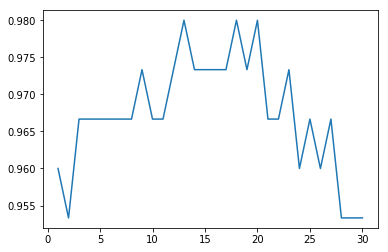

In [21]:
plt.plot(k_range, k_scores)
# complexity vs accuracy, U upside down is typical!

In [22]:
# comparing models: knn vs logistic regression (check it out!)
# from sklearn.linear_model import LogisticRegression
knn=KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, x,y,cv=10, scoring='accuracy').mean())
logred = LogisticRegression()
print(cross_val_score(logReg, x, y, cv=10, scoring='accuracy').mean())

0.9800000000000001
0.9533333333333334


In [24]:
# tuning parameters choice optimization
from sklearn.model_selection import GridSearchCV  # automate the process
# define set of parameters to try, performs cross val (replaces for loop above)
k_range = list(range(1,31))[::-1]
param_grid = dict(n_neighbors=k_range)
print(param_grid)
# istantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # automate the for loop
# object ready to do 10 fold cross validation, and repeat it for each model-parameter. 
grid.fit(x, y)
print('type of this object:', type(grid.grid_scores_))  # list of 30 named tuples
# in total, 300 estimations were made (30x10)
grid.grid_scores_

{'n_neighbors': [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}
type of this object: <class 'list'>


C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95333, std: 0.04269, params: {'n_neighbors': 30},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 26},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 25},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 24},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 23},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 21},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 18},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14

In [25]:
grid.grid_scores_[0]

C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.95333, std: 0.04269, params: {'n_neighbors': 30}

In [26]:
type(grid.grid_scores_[0])

C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


sklearn.model_selection._search._CVScoreTuple

In [28]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 30}
[0.93333333 0.93333333 1.         0.93333333 1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.9533333333333334


C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'cross validatet accuracy')

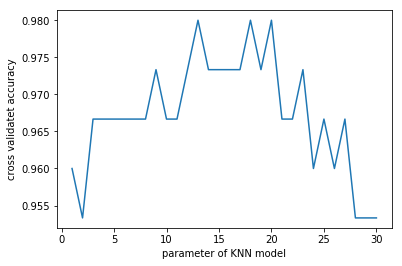

In [29]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
# just the same as before! :D
plt.xlabel("parameter of KNN model")
plt.ylabel("cross validatet accuracy")

In [30]:
# or, we can use built in attributes
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


In [31]:
# multiple parameters simultaneously
k_range =list(range(1,31))[::-1]
# k_range =list(range(1,31))   we obtain different results, like this!
# we prefer to have simpler models (high k) >> so we reverse the list
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # automate the for loop
grid.fit(x, y)
print('type of this object:', type(grid.grid_scores_))  # list of 30 named tuples
grid.grid_scores_

{'n_neighbors': [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 'weights': ['uniform', 'distance']}
type of this object: <class 'list'>


C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95333, std: 0.04269, params: {'n_neighbors': 30, 'weights': 'uniform'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 30, 'weights': 'distance'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 29, 'weights': 'distance'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 28, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 27, 'weights': 'distance'},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 26, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 26, 'weights': 'distance'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 25, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 25, 'weights': 'distance'},
 mean: 0.96000, std: 0

In [32]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 27, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='distance')


In [33]:
# remember to re train the data on the whole dataset!
# this is done by default by gridsearchCV  / grid.predict method
knn = KNeighborsClassifier(n_neighbors=27, weights='distance')
knn.fit(x, y)
print(knn.predict([[3,5,4,2]]))
print(grid.predict([[3,5,4,2]]))  # it's the same! automatizzato anche questo


[1]
[1]


In [34]:
from sklearn.grid_search import RandomizedSearchCV
param_dist = param_grid # this time only
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(x,y)
rand.grid_scores_

[mean: 0.98000, std: 0.03055, params: {'weights': 'distance', 'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 13},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.95333, std: 0.05207, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 21},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 9},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 17},
 mean: 0.98000, std: 0.03055, params: {'weights': 'distance', 'n_neighbors': 19},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 16}]

In [35]:
print(rand.best_estimator_)
print(rand.best_params_)
print(rand.best_score_)
# just like before! try several times, to check if the result is the same...

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')
{'weights': 'distance', 'n_neighbors': 15}
0.98
